### TTC Subway Delays EDA

The 1st step is to download all of the data about bus delays through their API.

We first print all of the files in this package and then download them in this folder.

In [1]:
# import requests

# # Toronto Open Data is stored in a CKAN instance. It's APIs are documented here:
# # https://docs.ckan.org/en/latest/api/

# # To hit our API, you'll be making requests to:
# base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca"

# # Datasets are called "packages". Each package can contain many "resources"
# # To retrieve the metadata for this package and its resources, use the package name in this page's URL:
# url = base_url + "/api/3/action/package_show"
# params = { "id": "ttc-subway-delay-data"}
# package = requests.get(url, params = params).json()

# # To get resource data:
# for idx, resource in enumerate(package["result"]["resources"]):
#     print('{idx}, {name}, {resource}'.format(idx=idx, name=resource['name'], resource=resource))
#     # To get metadata for non datastore_active resources:
#     if not resource["datastore_active"]:
#         url = base_url + "/api/3/action/resource_show?id=" + resource["id"]
#         resource_metadata = requests.get(url).json()
#         print(resource_metadata)
#         # From here, you can use the "url" attribute to download this file

In [2]:
# for idx, resource in enumerate(package["result"]["resources"]):
#     xlsx_url = resource["url"]
#     response = requests.get(xlsx_url)
    
#     if response.status_code == 200:
#         # Assuming you want to save the XLSX content to a file
#         xlsx_filename = f"{resource['name']}.xlsx"
#         with open(xlsx_filename, "wb") as file:
#             file.write(response.content)
#         print(f"XLSX resource downloaded successfully. Check '{xlsx_filename}' file.")
#     else:
#         print("Failed to download the XLSX resource.")
#         break  # Exit the loop if there was an error

### Importing packages for EDA

In [3]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as ss
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import datetime as dt

In [4]:
#sometimes it's more convenient to look at DFs with these settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

### Readme

In [5]:
df_readme = pd.read_excel('ttc-subway-delay-data-readme.xlsx')
df_readme

,Field Name,Description,Example
0,Date,Date (YYYY/MM/DD),2016-12-31 00:00:00
1,Time,Time (24h clock),01:59:00
2,Day,Name of the day of the week,Saturday
3,Station,TTC subway station name,Rosedale Station
4,Code,TTC delay code,MUIS
5,Min Delay,Delay (in minutes) to subway service,5
6,Min Gap,Time length (in minutes) between trains,9
7,Bound,Direction of train dependant on the line,N
8,Line,"TTC subway line i.e. YU, BD, SHP, and SRT",YU
9,Vehicle,TTC train number,5961


2018
	Hist      [1167  467  114   41   31   21]
	Fit       [3.34085845e-01 5.79903830e+03]
	Expect    [1173.75267225  430.825774    158.13454736   58.04326616   21.30477371
    7.81991457]
	statistic: 47.20879357185118
	p-value  : 5.150971374776692e-09
	Rejest  the null hypothesis: delay times do not come from an exponential dist.

	Hist Norm [0.63389462 0.25366649 0.06192287 0.02227051 0.01683867 0.01140684]
	Fit  Norm [0.33408552 3.14994038]
	Exp. Norm [0.63756246 0.23401745 0.08589616 0.03152821 0.01157244 0.00424767]
	statistic: 0.02564293255509064
	p-value  : 0.9999944500087785
	Accept the null hypothesis: delay times do come from an exponential dist.
2019
	Hist      [1200  467   94   51   15   13]
	Fit       [3.47075355e-01 5.85429997e+03]
	Expect    [1207.2560233   426.18743962  150.45336713   53.11328673   18.75013688
    6.61920311]
	statistic: 32.23800843882742
	p-value  : 5.330064463216983e-06
	Rejest  the null hypothesis: delay times do not come from an exponential dist.

	

/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_23973/640268919.py:4: RuntimeWarning: overflow encountered in exp
  return b * a * np.exp(-a * x)
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_23973/640268919.py:4: RuntimeWarning: overflow encountered in exp
  return b * a * np.exp(-a * x)


2020
	Hist      [792 387  82  40  12   8]
	Fit       [2.96023730e-01 4.23644725e+03]
	Expect    [804.42604205 330.97996371 136.1812406   56.03157993  23.05411476
   9.4855831 ]
	statistic: 41.41506109283652
	p-value  : 7.734882659639103e-08
	Rejest  the null hypothesis: delay times do not come from an exponential dist.

	Hist Norm [0.5995458  0.29295988 0.06207419 0.03028009 0.00908403 0.00605602]
	Fit  Norm [0.29602414 3.20699851]
	Exp. Norm [0.60895249 0.25055234 0.10308928 0.04241589 0.01745194 0.00718057]
	statistic: 0.0313511111234091
	p-value  : 0.9999908457904801
	Accept the null hypothesis: delay times do come from an exponential dist.
2021
	Hist      [655 368  85  34  20  19]
	Fit       [2.65202959e-01 3.76687334e+03]
	Expect    [671.11216323 302.87718829 136.69040172  61.6892478   27.84074995
  12.56470755]
	statistic: 52.40932767132445
	p-value  : 4.4463679490060713e-10
	Rejest  the null hypothesis: delay times do not come from an exponential dist.

	Hist Norm [0.55461473 0.

/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_23973/640268919.py:4: RuntimeWarning: overflow encountered in exp
  return b * a * np.exp(-a * x)
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_23973/640268919.py:4: RuntimeWarning: overflow encountered in multiply
  return b * a * np.exp(-a * x)
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_23973/640268919.py:4: RuntimeWarning: overflow encountered in exp
  return b * a * np.exp(-a * x)


2022
	Hist      [10926  5437  1672   656   362   286]
	Fit       [2.73923763e-01 6.09120761e+04]
	Expect    [11063.37780078  4864.03853343  2138.48530537   940.18979698
   413.35652489   181.73311093]
	statistic: 323.8857214111187
	p-value  : 7.303518587047521e-68
	Rejest  the null hypothesis: delay times do not come from an exponential dist.

	Hist Norm [0.56497234 0.28114173 0.08645742 0.03392109 0.01871865 0.01478877]
	Fit  Norm [0.27392353 3.14970249]
	Exp. Norm [0.57207591 0.25151461 0.11057903 0.04861635 0.0213743  0.00939727]
	statistic: 0.01674782977129072
	p-value  : 0.9999980806765777
	Accept the null hypothesis: delay times do come from an exponential dist.


/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_23973/640268919.py:4: RuntimeWarning: overflow encountered in exp
  return b * a * np.exp(-a * x)
/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_23973/640268919.py:4: RuntimeWarning: overflow encountered in multiply
  return b * a * np.exp(-a * x)


2023
	Hist      [14722  4617  1667   672   389   312]
	Fit       [3.73835778e-01 6.88349789e+04]
	Expect    [14687.83630483  4785.1259883   1558.93831118   507.8839437
   165.46267317    53.90581166]
	statistic: 1542.6248344921457
	p-value  : 0.0
	Rejest  the null hypothesis: delay times do not come from an exponential dist.

	Hist Norm [0.65784888 0.20630949 0.07448948 0.03002815 0.01738237 0.01394164]
	Fit  Norm [0.3738359  3.07587346]
	Exp. Norm [0.65632231 0.21382209 0.06966072 0.02269464 0.00739365 0.00240876]
	statistic: 0.06893198568553607
	p-value  : 0.9999352528305443
	Accept the null hypothesis: delay times do come from an exponential dist.
Starting: Output File Creation


/var/folders/ph/g3b0j_7j153_jkqhvhfnmppr0000gp/T/ipykernel_23973/640268919.py:4: RuntimeWarning: overflow encountered in exp
  return b * a * np.exp(-a * x)


Completed: Output File Creation


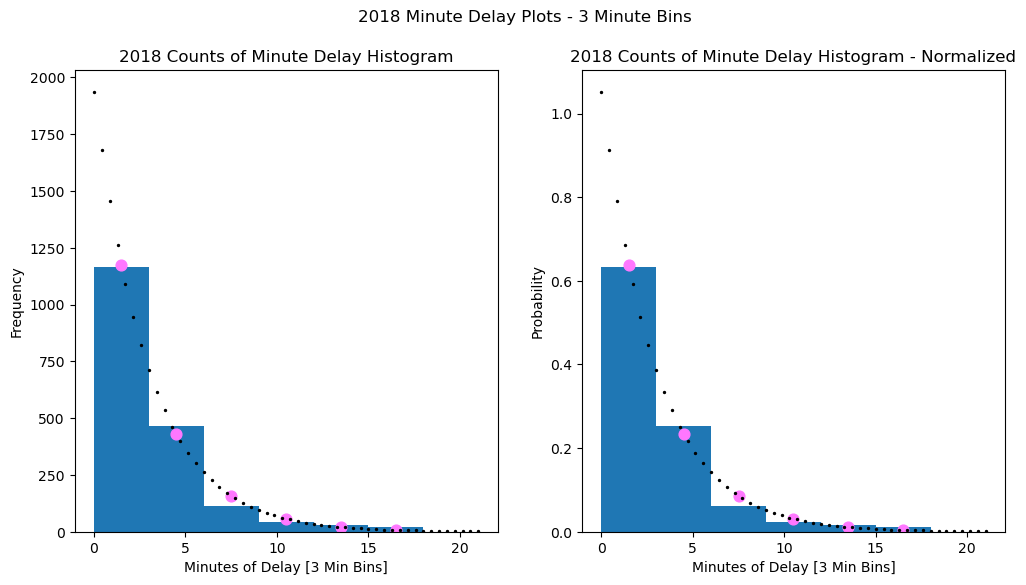

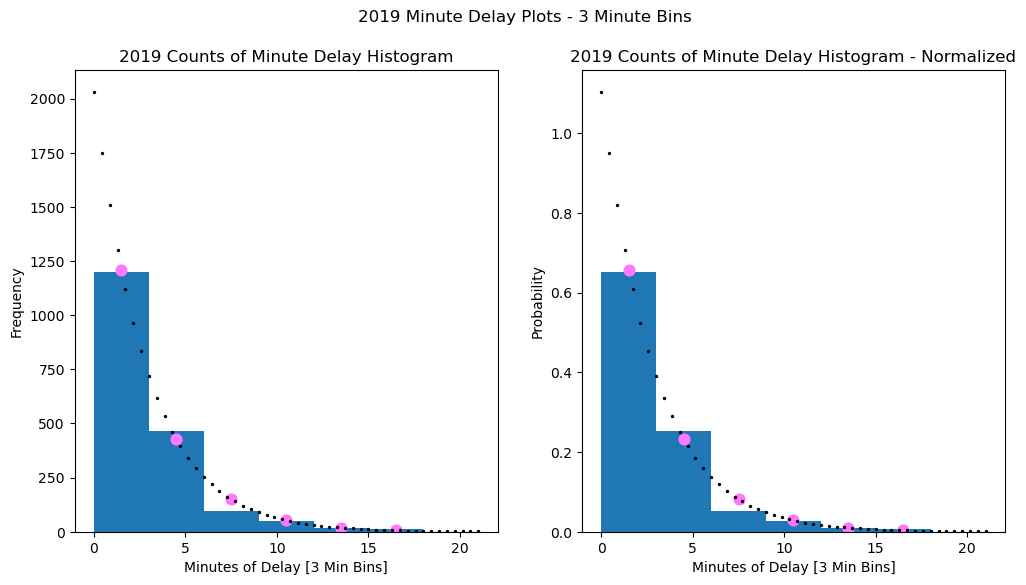

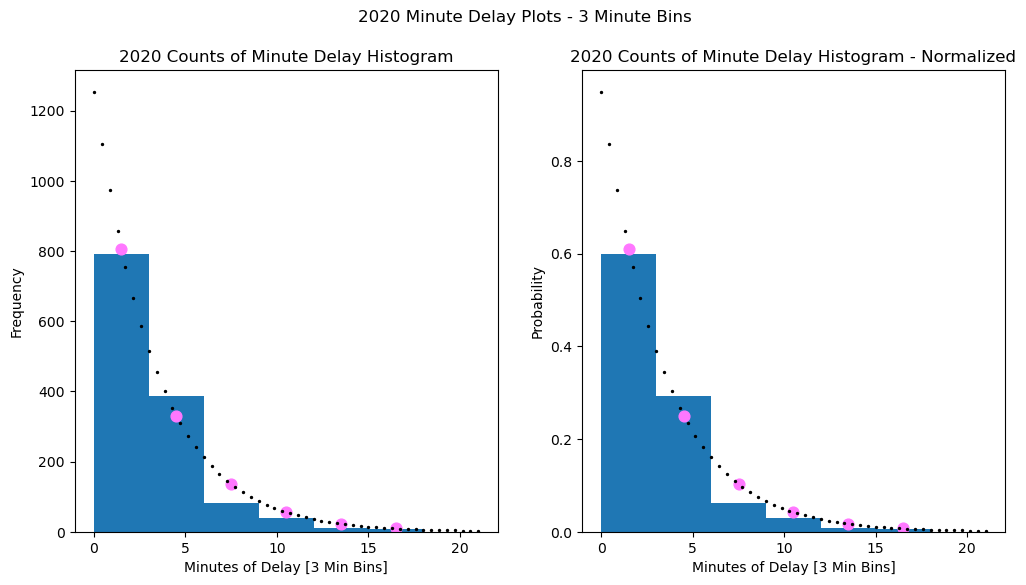

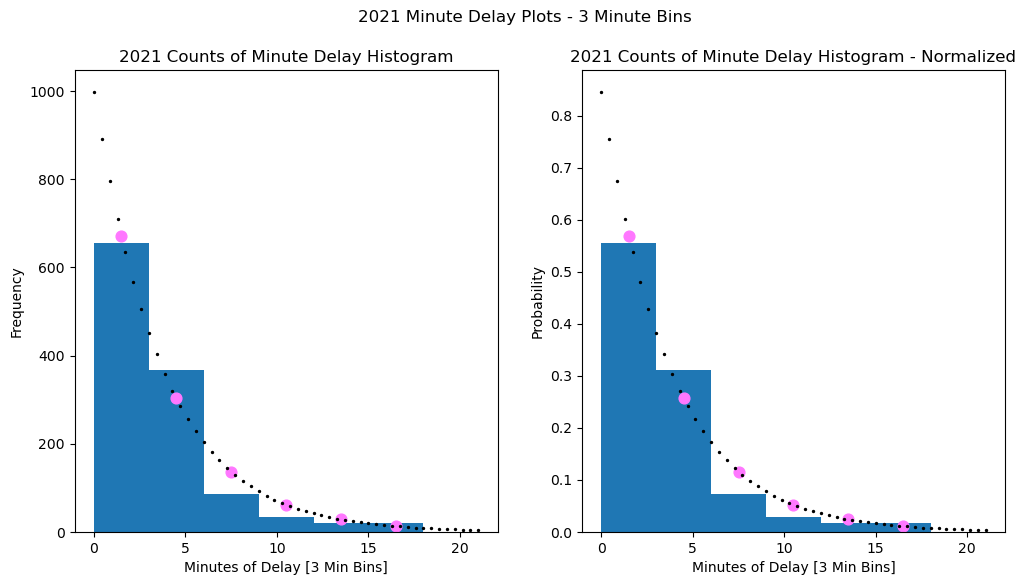

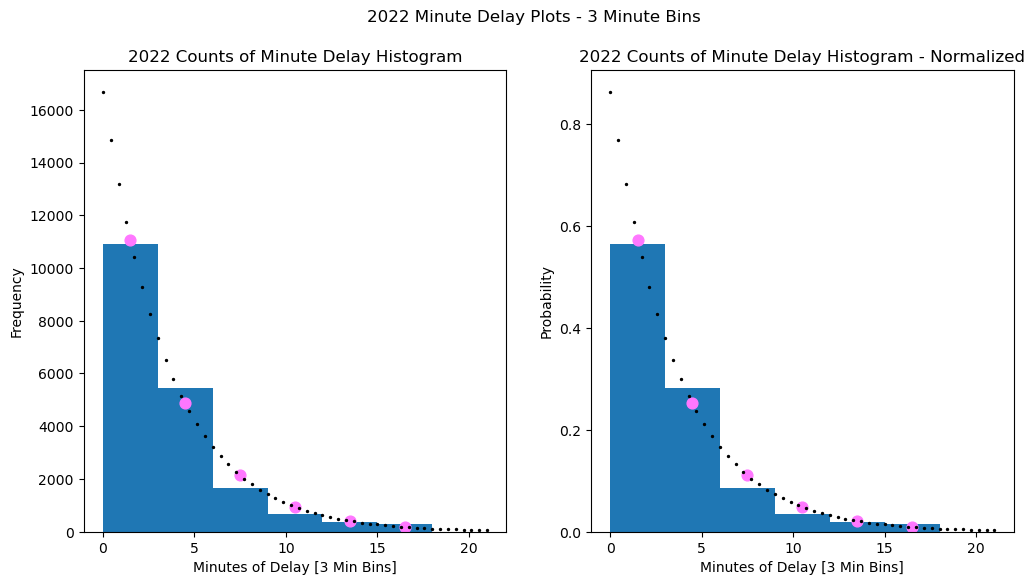

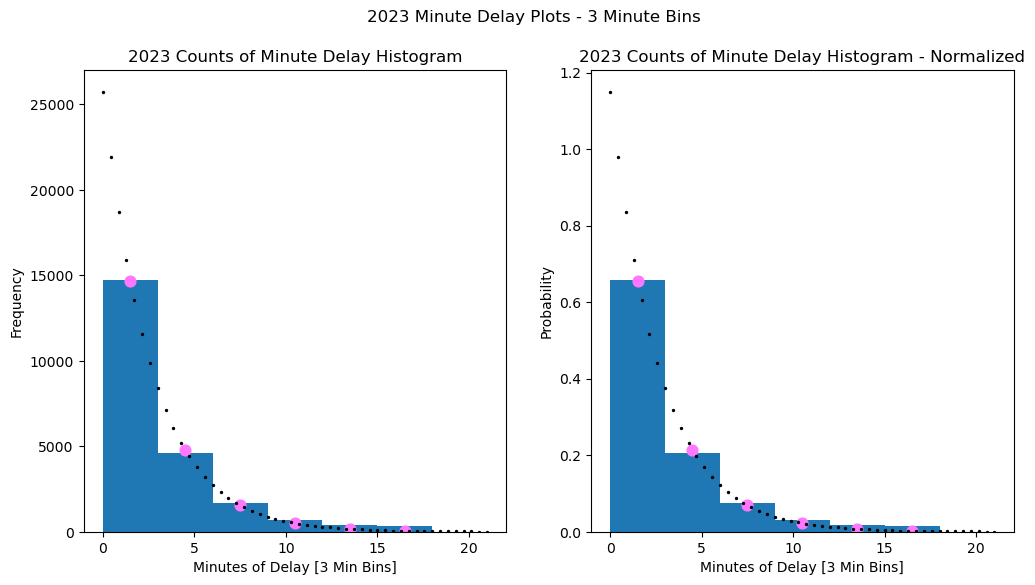

In [6]:
years = np.arange(2018,2024,1)

def func(x, a, b):
    return b * a * np.exp(-a * x)

x_min       = 0
x_max       = 21
x_step      = 3
bins        = np.arange(x_min,x_max,x_step)
x           = bins[:-1]+x_step/2

fig_array   = []

for year in years:
    df = pd.read_excel(f'ttc-subway-delay-data-{year}.xlsx')

    print(f"{year}")
    fig, ax = plt.subplots(1,2, figsize=(12,6))
    plt.suptitle(f"{year} Minute Delay Plots - {x_step} Minute Bins")
    
    sample = df[df['Min Delay']>=x_min]['Min Delay']
    
    ax[0].set_title(f"{year} Counts of Minute Delay Histogram")
    ax[0].set_xlabel(f"Minutes of Delay [{x_step} Min Bins]")
    hist, bin_edges = np.histogram(sample,bins=bins)
    print("\tHist     ",hist)
    popt_1, pcov_1 = curve_fit(func, x, hist)
    print("\tFit      ",popt_1)
    y_1 = func(x,popt_1[0],popt_1[1])
    print("\tExpect   ",y_1)
    raw_stat, raw_pv = ss.chisquare(hist,y_1/sum(y_1)*sum(hist))
    print(f"\tstatistic: {raw_stat}")
    print(f"\tp-value  : {raw_pv}")
    df['Min Delay'].plot(kind='hist',bins=bins,ax=ax[0])
    ax[0].scatter(x=x,y=y_1,c='#ff77ff',s=60)

    x_range = np.linspace(x_min,x_max)
    y_range = func(x_range,popt_1[0],popt_1[1])
    ax[0].scatter(x=x_range,y=y_range,c='#000000',s=2)
    if raw_pv<0.1:
        print("\tRejest  the null hypothesis: delay times do not come from an exponential dist.")
    else:
        print("\tAccept the null hypothesis: delay times do come from an exponential dist.")

    print()

    ax[1].set_title(f"{year} Counts of Minute Delay Histogram - Normalized")
    ax[1].set_xlabel(f"Minutes of Delay [{x_step} Min Bins]")
    ax[1].set_ylabel(f"Probability")
    hist_norm   = hist/sum(hist)
    print("\tHist Norm",hist_norm)
    popt, pcov = curve_fit(func, x, hist_norm)
    print("\tFit  Norm",popt)
    y = func(x,popt[0],popt[1])
    print("\tExp. Norm",y)
    normed_stat, normed_pv = ss.chisquare(hist_norm,y/sum(y))
    print(f"\tstatistic: {normed_stat}")
    print(f"\tp-value  : {normed_pv}")

    ax[1].bar(x,hist_norm,width=x_step,align='center')
    ax[1].scatter(x=x,y=y,c='#ff77ff',s=60)

    x_range = np.linspace(x_min,x_max)
    y_range = func(x_range,popt[0],popt[1])
    ax[1].scatter(x=x_range,y=y_range,c='#000000',s=2)
    if normed_pv<0.1:
        print("\tRejest  the null hypothesis: delay times do not come from an exponential dist.")
    else:
        print("\tAccept the null hypothesis: delay times do come from an exponential dist.")

    fig_array.append(fig)
    
title = f"TTC Subway Delay Graphs"
# Create the PdfPages object to which we will save the pages:
# The with statement makes sure that the PdfPages object is closed properly at
# the end of the block, even if an Exception occurs.
with PdfPages(f'{title}.pdf') as pdf:
    print(f"Starting: Output File Creation")
    for fig in fig_array:
        pdf.savefig(fig)  # saves the current figure into a pdf page

    # We can also set the file's metadata via the PdfPages object:
    d = pdf.infodict()
    d['Title'] = f'{title}'
    d['Author'] = 'Connor Blandford'
    d['Subject'] = 'UofT SCS 3251 Stats for Data Science Term Project'
    d['CreationDate'] = dt.datetime.today()
    print(f"Completed: Output File Creation")
    
plt.show()

In [7]:
# df[np.logical_and(df['Bound'].isna(), df['Vehicle']==0)]

In [8]:
df.tail(10)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
22939,2023-12-31,01:23,Sunday,UNION STATION,MUPAA,0,0,N,YU,6026
22940,2023-12-31,01:30,Sunday,OSGOODE STATION,MUPAA,0,0,N,YU,6026
22941,2023-12-31,01:38,Sunday,QUEEN STATION,MUPAA,0,0,N,YU,5576
22942,2023-12-31,01:46,Sunday,WELLESLEY STATION,MUPAA,4,10,N,YU,5576
22943,2023-12-31,01:53,Sunday,OSGOODE STATION,MUPAA,0,0,S,YU,6051
22944,2023-12-31,12:25,Sunday,SHEPPARD-YONGE STATION,MUIR,7,14,W,SHP,6196
22945,2023-12-31,13:53,Sunday,BAYVIEW STATION,TUSC,0,0,E,SHP,6191
22946,2023-12-31,14:57,Sunday,SHEPPARD-YONGE STATION,MUO,51,58,W,SHP,6171
22947,2023-12-31,15:15,Sunday,BAYVIEW STATION,TUOPO,7,14,E,SHP,6141
22948,2023-12-31,20:52,Sunday,DON MILLS STATION,PUMEL,0,0,NaN,SHP,0


### Comparing all of the files

First we will look at .info(), then at .describe()

In [9]:
years = np.arange(2018, 2025, 1)
for year in years:
    df = pd.read_excel('ttc-subway-delay-data-{}.xlsx'.format(year))
    print('Year {}'.format(year))
    print(df.info())
    print('\n')

Year 2018
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1873 non-null   datetime64[ns]
 1   Time       1873 non-null   object        
 2   Day        1873 non-null   object        
 3   Station    1873 non-null   object        
 4   Code       1873 non-null   object        
 5   Min Delay  1873 non-null   int64         
 6   Min Gap    1873 non-null   int64         
 7   Bound      1480 non-null   object        
 8   Line       1863 non-null   object        
 9   Vehicle    1873 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 146.5+ KB
None


Year 2019
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1871 non-null 

In [10]:
for year in years:
    df = pd.read_excel('ttc-subway-delay-data-{}.xlsx'.format(year))
    print(year, len(df)) #number of delays per year

2018 1873
2019 1871
2020 1339
2021 1216
2022 19895
2023 22949
2024 2259


In [11]:
for year in years:
    print('Year {}'.format(year))
    df = pd.read_excel('ttc-subway-delay-data-{}.xlsx'.format(year))
    print(df.describe())
    print('\n')

Year 2018
         Min Delay      Min Gap      Vehicle
count  1873.000000  1873.000000  1873.000000
mean      2.791244     3.980246  4073.530166
std       9.385311    10.218298  2376.690666
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000  3004.000000
50%       0.000000     0.000000  5249.000000
75%       3.000000     7.000000  5646.000000
max     248.000000   253.000000  8713.000000


Year 2019
         Min Delay      Min Gap      Vehicle
count  1871.000000  1871.000000  1871.000000
mean      2.442010     3.599145  4006.287012
std       7.492651     8.362168  2406.589266
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000  5219.000000
75%       3.000000     6.000000  5596.000000
max     174.000000   178.000000  6621.000000


Year 2020
         Min Delay      Min Gap      Vehicle
count  1339.000000  1339.000000  1339.000000
mean      2.880508     4.211352  4003.699776
std      10.673749   